In [54]:
%config IPCompleter.greedy=True
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\jagdeesh\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
print("images shape: %s" % str(digits.images.shape))
print("targets shape: %s" % str(digits.target.shape))


images shape: (1797L, 8L, 8L)
targets shape: (1797L,)


In [11]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys);


In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# prepare the data
X = digits.data.reshape(-1, 64)
print(X.shape)

(1797L, 64L)


In [15]:
y = digits.target
print(y.shape)

(1797L,)


In [16]:
print(X)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [18]:
pca = PCA(n_components=2)

In [19]:
pca.fit(X);

In [20]:
X_pca = pca.transform(X)
X_pca.shape

(1797L, 2L)

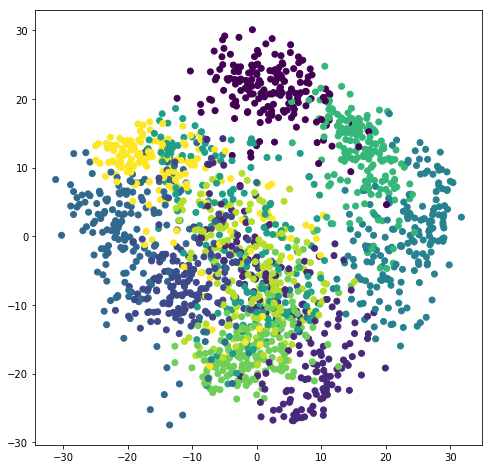

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);
plt.show()

In [26]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64L,)
(2L, 64L)


In [27]:
fix, ax = plt.subplots(1, 3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys);

In [28]:
from sklearn.manifold import Isomap

In [29]:
isomap = Isomap(n_components=2, n_neighbors=20)

In [30]:
isomap.fit(X);

In [31]:
X_isomap = isomap.transform(X)
X_isomap.shape

(1797L, 2L)

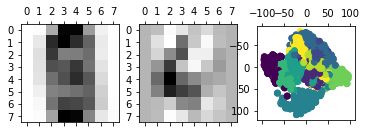

In [33]:
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);
plt.show()

In [34]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\jagdeesh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (1347L, 64L)
y_train shape: (1347L,)
X_test shape: (450L, 64L)
y_test shape: (450L,)


In [38]:
svm = LinearSVC()

In [39]:
svm.fit(X_train, y_train);

In [40]:
svm.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])

In [41]:
svm.score(X_train, y_train)

0.99554565701559017

In [42]:
svm.score(X_test, y_test)

0.93555555555555558

In [46]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [47]:
rf.fit(X_train, y_train);

In [48]:
rf.score(X_train, y_train)

0.99925760950259834

In [49]:
rf.score(X_test, y_test)

0.93111111111111111

In [52]:
from sklearn.cross_validation import cross_val_score
scores =  cross_val_score(rf, X_train, y_train, cv=5)
print("scores: %s  mean: %f  std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [ 0.94160584  0.93726937  0.95571956  0.92509363  0.9469697 ]  mean: 0.941332  std: 0.010189


In [53]:
rf2 = RandomForestClassifier(n_estimators=50)
scores =  cross_val_score(rf2, X_train, y_train, cv=5)
print("scores: %s  mean: %f  std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [ 0.96350365  0.97785978  0.96309963  0.96629213  0.97348485]  mean: 0.968848  std: 0.005846


In [57]:
    param_grid = {'C': 10. ** np.arange(-3, 4)}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=3)

In [58]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.951327 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.966592 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.970852 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.951327 -   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.957684 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.959641 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.949115 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.948775 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.955157 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.940265 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.942094 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.7s finished


In [59]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.001}
0.96288047513


In [60]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.001}
0.96288047513
